# TensorFlow Regression Example

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


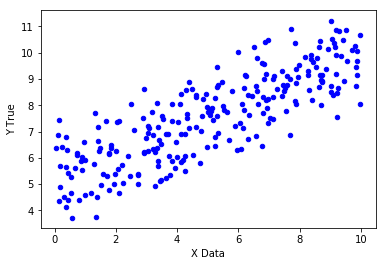

In [2]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))

y_true = (0.5 * x_data + 5) + noise

x_df = pd.DataFrame(x_data,columns=['X Data'])
y_df = pd.DataFrame(y_true, columns = ['Y True'])

my_data = pd.concat([x_df,y_df],axis=1)

#Plot a sub sample of the data
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y True', color = 'b')
plt.show()

In [3]:
batch_size = 8 

m = tf.Variable(float(np.random.randn(1)))
b = tf.Variable(float(np.random.randn(1)))

x_placeholder = tf.placeholder(tf.float32,shape=[batch_size])
y_placeholder = tf.placeholder(tf.float32,shape=[batch_size])

y_model = m*x_placeholder + b

error = tf.reduce_sum(tf.square(y_placeholder-y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

init = tf.global_variables_initializer()

In [4]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_idx = np.random.randint(len(x_data),size=batch_size)
        
        feed_dict = {x_placeholder: x_data[rand_idx], 
                     y_placeholder: y_true[rand_idx]}
        
        sess.run(train,feed_dict=feed_dict)
        
    m_predicted, b_predicted = sess.run([m,b])
    
    print(m_predicted, b_predicted)

0.59328103 4.8471284


In [5]:
y_predicted = m_predicted*x_data + b_predicted

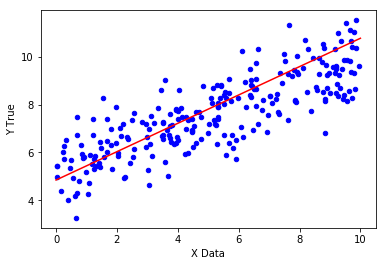

In [6]:
#Plot a sub sample of the data
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y True', color = 'b')
plt.plot(x_data, y_predicted, 'r-')
plt.show()

# TF Estimator

In [7]:
feature_columns = [tf.feature_column.numeric_column(key='x',shape=[1])] # list of feature columns

estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpdcqap0vy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb30e56a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                    x_data, y_true, test_size=0.33, random_state=42)

input_func = tf.estimator.inputs.numpy_input_fn(x = {'x':x_train},
                                                y = y_train,
                                                batch_size=8, 
                                                num_epochs=None, 
                                                shuffle=True)
                #tf.estimator.inputs.pandas_input_fn for pandas df
train_input_fnc = tf.estimator.inputs.numpy_input_fn(x = {'x':x_train},
                                                y = y_train,
                                                batch_size=8, 
                                                num_epochs=1000, #number of training steps
                                                shuffle=False) #false b/c we use this for eval vs. test set

test_input_fnc = tf.estimator.inputs.numpy_input_fn(x = {'x':x_test},
                                                y = y_test,
                                                batch_size=8, 
                                                num_epochs=1000, #number of training steps
                                                shuffle=False) #false b/c we use this for eval vs. test set

In [9]:
estimator.train(input_fn = input_func, steps = 1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpdcqap0vy/model.ckpt.
INFO:tensorflow:loss = 449.1851, step = 1
INFO:tensorflow:global_step/sec: 1211.91
INFO:tensorflow:loss = 25.181778, step = 101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1602.33
INFO:tensorflow:loss = 25.552456, step = 201 (0.062 sec)
INFO:tensorflow:global_step/sec: 1642.88
INFO:tensorflow:loss = 14.037622, step = 301 (0.060 sec)
INFO:tensorflow:global_step/sec: 1706.31
INFO:tensorflow:lo

In [10]:
train_metrics = estimator.evaluate(input_fn = train_input_fnc,steps=1000)
train_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-13-04:56:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpdcqap0vy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-13-04:57:00
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.078259, global_step = 1000, label/mean = 7.5009513, loss = 8.626072, prediction/mean = 7.386254
INFO:tensorflow:Saving 'ch

{'average_loss': 1.078259,
 'label/mean': 7.5009513,
 'loss': 8.626072,
 'prediction/mean': 7.386254,
 'global_step': 1000}

In [11]:
test_metrics = estimator.evaluate(input_fn = test_input_fnc,steps = 1000)
test_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-13-04:57:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpdcqap0vy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-13-04:57:01
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0697807, global_step = 1000, label/mean = 7.481345, loss = 8.558246, prediction/mean = 7.3588996
INFO:tensorflow:Saving 'c

{'average_loss': 1.0697807,
 'label/mean': 7.481345,
 'loss': 8.558246,
 'prediction/mean': 7.3588996,
 'global_step': 1000}

In [12]:
unlabeled_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':unlabeled_data}, shuffle = False)

prediction_generator_list = list(estimator.predict(input_fn=input_fn_predict))
prediction_generator_list

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpdcqap0vy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.472747], dtype=float32)},
 {'predictions': array([5.1183677], dtype=float32)},
 {'predictions': array([5.763989], dtype=float32)},
 {'predictions': array([6.40961], dtype=float32)},
 {'predictions': array([7.055231], dtype=float32)},
 {'predictions': array([7.7008514], dtype=float32)},
 {'predictions': array([8.346473], dtype=float32)},
 {'predictions': array([8.992094], dtype=float32)},
 {'predictions': array([9.637714], dtype=float32)},
 {'predictions': array([10.283336], dtype=float32)}]

In [13]:
predictions = []

for pred in prediction_generator_list:
    predictions.append(pred['predictions'])
predictions    

[array([4.472747], dtype=float32),
 array([5.1183677], dtype=float32),
 array([5.763989], dtype=float32),
 array([6.40961], dtype=float32),
 array([7.055231], dtype=float32),
 array([7.7008514], dtype=float32),
 array([8.346473], dtype=float32),
 array([8.992094], dtype=float32),
 array([9.637714], dtype=float32),
 array([10.283336], dtype=float32)]

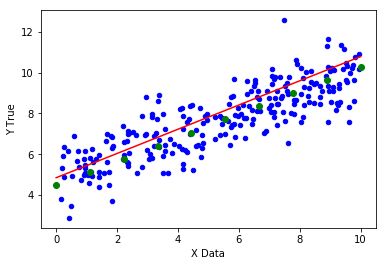

In [14]:
#Plot a sub sample of the data
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y True', color = 'b')
plt.plot(x_data, y_predicted, 'r-')
plt.plot(unlabeled_data,predictions,'go')
plt.show()

In [15]:
feature_columns

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]